<a href="https://www.kaggle.com/code/makitdev/house-prices-regression-fastai?scriptVersionId=104389322" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.tabular.all import *

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Import the datasets
path = Path('/kaggle/input/house-prices-advanced-regression-techniques')
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# Fill the missing values with mean
train_df.fillna(value=train_df.mean(), inplace=True)
test_df.fillna(value=test_df.mean(), inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Log the price so it doesn't vary so much and so high
train_df['SalePrice'] = np.log(train_df['SalePrice'])

In [8]:
dls = TabularDataLoaders.from_df(train_df, y_names='SalePrice', y_block=RegressionBlock(),
    cat_names = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
    cont_names = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
    procs = [Categorify, FillMissing, Normalize])

In [9]:
dls.show_batch()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,20,RL,Pave,#na#,IR3,Lvl,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Family,182.000001,14572.000164,2003.999999,2004.000000,-0.000002,1300.000008,-0.000001,230.000000,1529.999996,1530.000011,0.000006,9.134843e-08,1529.999999,1.000000e+00,2.088131e-10,2.0,1.147194e-08,3.0,1.0,7.0,1.000000e+00,2004.000001,3.0,629.999998,143.999999,36.000000,-1.107086e-07,7.957439e-10,3.736953e-07,1.362507e-07,-6.619928e-09,2007.0,12.464583
1,20,FV,Pave,#na#,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,New,Partial,72.000000,8639.999967,2009.000000,2009.000000,71.999999,935.999992,-0.000001,363.999998,1299.999999,1313.999999,0.000006,9.134843e-08,1313.999996,1.000000e+00,2.088131e-10,2.0,1.147194e-08,3.0,1.0,6.0,-1.158810e-08,2009.000001,2.0,552.000002,134.999998,112.000002,-1.107086e-07,7.957439e-10,3.736953e-07,1.362507e-07,-6.619928e-09,2009.0,12.343467
2,120,RL,Pave,#na#,IR1,Lvl,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,New,Partial,44.000001,6371.000089,2009.000000,2010.000000,128.000000,732.999987,-0.000001,624.999997,1358.000005,1358.000007,0.000006,9.134843e-08,1357.999995,1.000000e+00,2.088131e-10,2.0,1.147194e-08,2.0,1.0,6.0,1.000000e+00,2010.000001,2.0,484.000000,191.999999,35.000000,-1.107086e-07,7.957439e-10,3.736953e-07,1.362507e-07,-6.619928e-09,2010.0,12.319402
3,20,RL,Pave,#na#,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,#na#,Detchd,Unf,Ex,Ex,Y,#na#,#na#,Shed,WD,Normal,70.000000,9100.000054,1959.000000,1959.000000,-0.000002,612.000000,-0.000001,252.000006,863.999996,863.999993,0.000006,9.134843e-08,863.999990,1.519786e-08,2.088131e-10,1.0,1.147194e-08,2.0,1.0,5.0,-1.158810e-08,2008.000001,1.0,300.000006,-0.000002,0.000001,-1.107086e-07,7.957439e-10,3.736953e-07,1.362507e-07,4.500000e+02,2009.0,11.755872
4,20,RL,Pave,#na#,Reg,Lvl,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,70.049957,11400.000020,2001.000000,2002.000000,704.999997,1281.999979,-0.000001,1350.999979,2632.999959,2632.999966,0.000006,9.134843e-08,2632.999998,1.000000e+00,2.088131e-10,2.0,1.000000e+00,2.0,1.0,8.0,2.000000e+00,2001.000000,3.0,804.000012,313.999999,140.000002,-1.107086e-07,7.957439e-10,3.736953e-07,1.362507e-07,-6.619928e-09,2007.0,13.053013
5,20,RL,Pave,#na#,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,73.000000,8687.999962,2004.999999,2005.000000,228.000002,-0.000010,-0.000001,1615.999959,1615.999978,1616.000013,0.000006,9.134843e-08,1615.999998,1.519786e-08,2.088131e-10,2.0,1.1471

In [10]:
learn = tabular_learner(dls, metrics=[rmse, exp_rmspe], layers=[300,200, 100, 50])

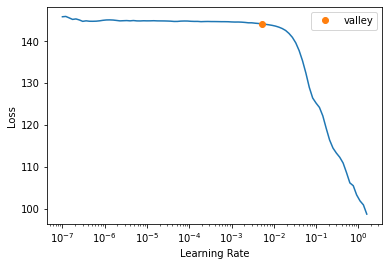

In [11]:
# Find a good learning rate
suggested_lr = learn.lr_find()

In [12]:
learn.fit_one_cycle(60, suggested_lr)

epoch,train_loss,valid_loss,_rmse,_exp_rmspe,time
0,144.198944,149.959152,12.245782,0.999995,00:00
1,143.899582,147.429474,12.142055,0.999995,00:00
2,143.390747,142.934967,11.955542,0.999993,00:00
3,142.413193,138.819427,11.782166,0.999991,00:00
4,140.442795,133.323395,11.546576,0.999990,00:00
5,136.478668,120.824844,10.992036,0.999982,00:00
6,128.671814,100.836739,10.041749,0.999953,00:00
7,114.970085,67.843803,8.236735,0.999715,00:00
8,94.584381,30.761305,5.546288,0.995781,00:00
9,70.616165,5.963442,2.442016,0.908188,00:00


In [13]:
learn.show_results()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,SalePrice_pred
0,15.0,3.0,2.0,0.0,4.0,4.0,5.0,1.0,19.0,3.0,3.0,2.0,6.0,5.0,8.0,2.0,2.0,13.0,14.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,6.0,6.0,2.0,3.0,2.0,5.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,5.0,0.010752,-0.408399,-1.854901,0.476922,-0.586156,-0.964879,-0.291180,0.267568,-0.837589,-0.549657,1.499045,-0.120653,0.816726,-0.822759,-0.233186,0.802709,-0.765700,2.625247,4.498636,2.192413,-0.944754,-0.024765,-2.391751,-2.220777,-0.750004,-0.727470,3.473890,-0.117634,-0.272181,-0.06476,-0.088091,-1.382901,11.982929,11.964096
1,6.0,4.0,2.0,0.0,1.0,4.0,5.0,1.0,15.0,3.0,3.0,1.0,6.0,8.0,9.0,4.0,2.0,13.0,14.0,2.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,1.0,2.0,1.0,2.0,5.0,3.0,7.0,5.0,4.0,1.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,0.010752,-0.166635,0.138802,0.525631,1.082278,0.279084,0.210245,-0.181590,0.183893,0.031964,2.812437,-0.120653,2.350651,-0.822759,4.022450,2.630318,1.226143,1.407500,-0.213837,2.818052,2.212536,0.628192,0.291789,1.655903,-0.750004,2.509002,-0.351395,-0.117634,-0.272181,-0.06476,-0.088091,0.133034,12.610871,12.735088
2,11.0,4.0,2.0,0.0,4.0,4.0,5.0,1.0,18.0,3.0,3.0,3.0,7.0,6.0,5.0,2.0,2.0,10.0,11.0,3.0,4.0,5.0,2.0,4.0,4.0,4.0,3.0,6.0,2.0,3.0,2.0,5.0,4.0,7.0,0.0,6.0,3.0,5.0,5.0,3.0,0.0,1.0,3.0,9.0,5.0,-0.270122,-0.421637,0.271716,-0.253724,-0.586156,1.319686,-0.291180,-1.280788,-0.008755,-0.272939,-0.799390,-0.120653,-0.882871,3.036610,-0.233186,-2.852510,-0.765700,-3.463492,4.498636,-1.561418,-0.944754,0.038192,0.291789,0.466308,1.385765,0.160973,-0.351395,-0.117634,-0.272181,-0.06476,1.006021,1.648969,11.877568,11.687889
3,1.0,4.0,2.0,0.0,1.0,2.0,1.0,1.0,23.0,3.0,3.0,1.0,3.0,9.0,5.0,4.0,2.0,13.0,14.0,4.0,3.0,5.0,3.0,1.0,4.0,2.0,3.0,6.0,2.0,1.0,2.0,5.0,3.0,7.0,3.0,2.0,1.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,0.751244,0.500946,1.102426,1.012729,0.568469,1.737225,-0.291180,0.238226,1.931164,1.945934,-0.799390,-0.120653,0.805031,1.106925,-0.233186,0.802709,-0.765700,0.189752,-0.213837,0.941136,0.633891,1.091764,1.633559,0.932816,0.690022,0.081648,-0.351395,-0.117634,-0.272181,-0.06476,-0.088091,-0.624934,12.841130,12.831068
4,5.0,5.0,2.0,0.0,4.0,4.0,1.0,1.0,18.0,3.0,3.0,1.0,1.0,5.0,4.0,2.0,2.0,14.0,15.0,3.0,4.0,5.0,1.0,4.0,4.0,4.0,6.0,6.0,2.0,3.0,1.0,1.0,4.0,7.0,0.0,2.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,-0.316547,-0.675997,-2.386555,-1.715016,-0.586156,-0.964879,-0.291180,-0.061965,-1.164642,-0.700828,0.492893,-0.120653,-0.134425,-0.822759,-0.233186,-1.024901,-0.765700,0.189752,-0.213837,-0.310141,-0.944754,-1.647523,-1.049981,-0.578669,-0.750004,-0.727470,0.940477,-0.117634,-0.272181,-0.06476,-0.088091,-1.382901,11.277204,11.445362
5,5.0,4.0,2.0,2.0,4.0,4.0,5.0,1.0,19.0,3.0,3.0,1.0,1.0,5.0,6.0,2.0,2.0,4.0,15.0,3.0,4.0,5.0,1.0,4.0,4.0,4.0,4.0,6.0,2.0,5.0,2.0,5.0,3.0,7.0,3.0,6.0,3.0,5.0,5.0,3.0,0.0,0.0,0.0,9.0,5.0,-0.920082,-0.675997,-1.589074,-1.715016,-0.586156,-0.493255,-0.291180,0.542932,-0.075958,-0.349805,0.760262,-0.120653,0.354794,-0.822759,-0.233186,0.802709,-0.765700,0.189752,-0.213837,-0.310141,0.633891,-2.321808,-1.049981,-0.783933,-0.750004,-0.727470,3.708776,-0.117634,-0.272181,-0.06476,-0.088091,1.648969,11.751943,11.934261
6,6.0,2.0,2.0,0.0,4.0,4.0,1.0,1.0,22.0,3.0,3.0,1.0,6.0,7.0,5.0,2.0,2.0,13.0,1

In [14]:
# Getting prediction
tst_dl = learn.dls.test_dl(test_df)
preds, _ = learn.get_preds(dl=tst_dl)

In [15]:
# exp on the values because they were done on a log of the price
test_preds = np.exp(preds).numpy().T[0]
test_preds

array([125291.88 , 155022.62 , 198506.64 , ..., 174572.78 , 113063.836,
       213273.88 ], dtype=float32)

In [16]:
test_df['SalePrice'] = test_preds

In [17]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,125291.882812
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155022.625000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,198506.640625
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200159.750000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,192864.750000


In [18]:
# Generate the submission file
sub_df = test_df[['Id','SalePrice']]
sub_df.to_csv('submission.csv', index=False)